Saving cpi_scb.csv to cpi_scb (1).csv
Saving population_scb.csv to population_scb (1).csv
Upload completed: dict_keys(['cpi_scb (1).csv', 'population_scb (1).csv'])


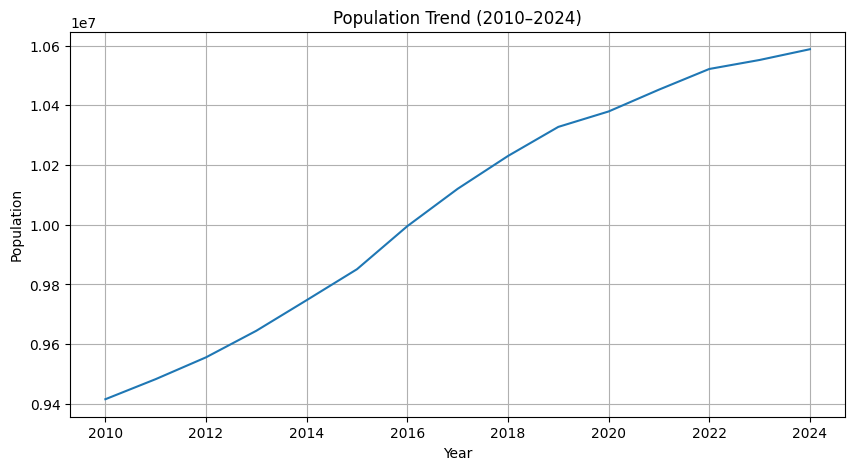

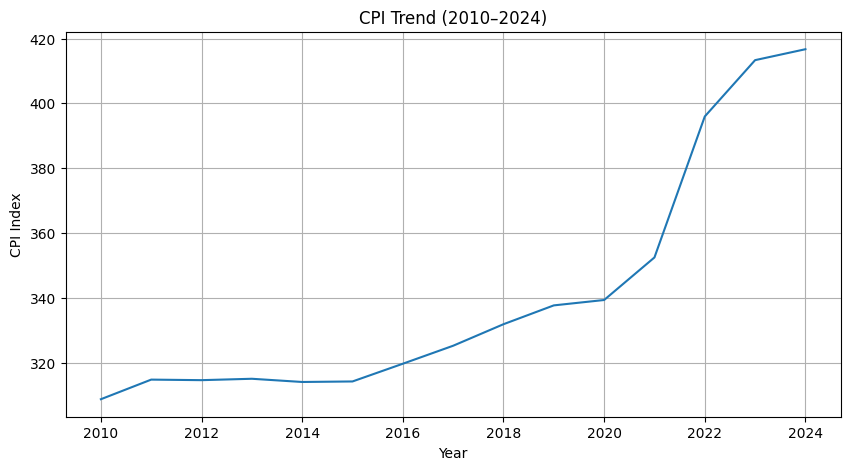

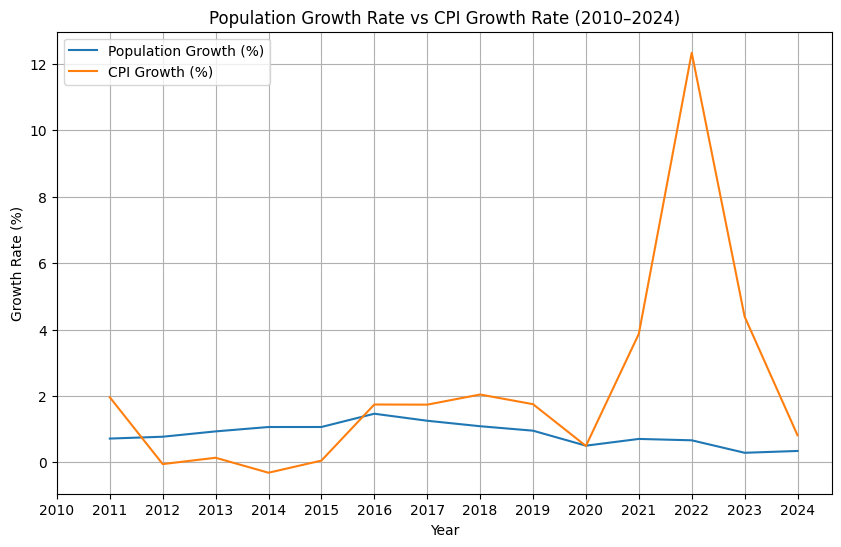

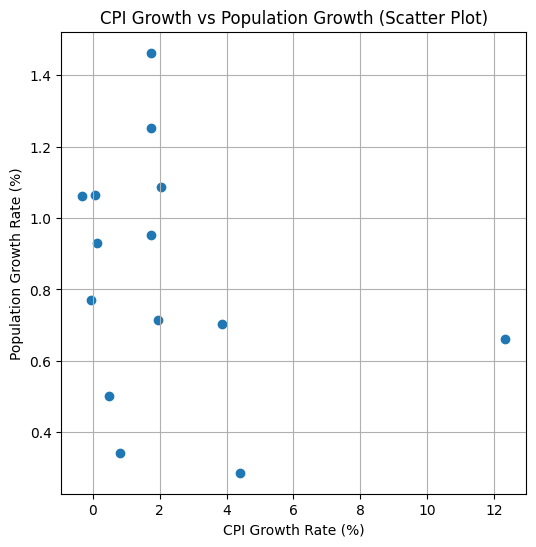

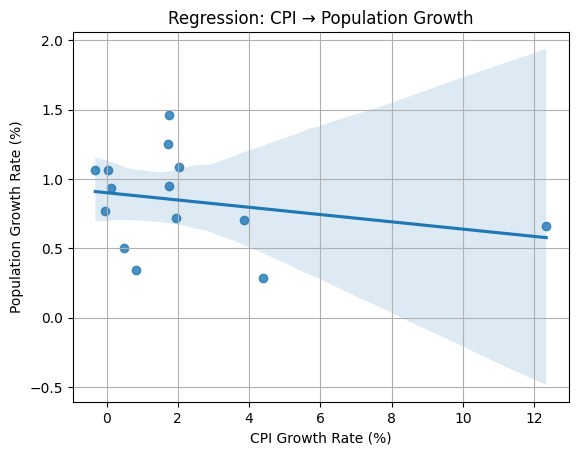

Regression coefficient: [-0.02626656]
R²: 0.06350411522333665


In [2]:
# =========================================
# 1. Import Libraries
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Optional: Font configuration (can remove if unnecessary)
plt.rcParams['font.family'] = 'DejaVu Sans'

# =========================================
# 2. Upload CSV Files (Google Colab only)
# =========================================
from google.colab import files
uploaded = files.upload()
print("Upload completed:", uploaded.keys())

# ▼ Modify if your filenames differ ▼
population_file = "population_scb.csv"
cpi_file = "cpi_scb.csv"

# =========================================
# 3. Read Data
# =========================================
df_pop = pd.read_csv(population_file)
df_cpi = pd.read_csv(cpi_file)

# =========================================
# 4. Aggregate Population by Year
# =========================================
yearly_pop = df_pop.groupby('Year')['Population'].sum().reset_index()

# =========================================
# 5. Population Trend Plot
# =========================================
plt.figure(figsize=(10, 5))
plt.plot(yearly_pop['Year'], yearly_pop['Population'])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trend (2010–2024)")
plt.grid(True)
plt.savefig("population_trend.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# 6. CPI Trend Plot
# =========================================
plt.figure(figsize=(10, 5))
plt.plot(df_cpi['Year'], df_cpi['CPI'])
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.title("CPI Trend (2010–2024)")
plt.grid(True)
plt.savefig("cpi_trend.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# 7. Merge Population and CPI by Year
# =========================================
df_merge = pd.merge(yearly_pop, df_cpi, on='Year', how='inner')
df_merge.head()

# =========================================
# 8. Pivot Population Data (Region × Year)
# =========================================
pop_year_region = df_pop.pivot(index="Year", columns="Region", values="Population")

# =========================================
# 9. Calculate Annual Growth by Region (%)
# =========================================
pop_growth = pop_year_region.pct_change() * 100

# =========================================
# 10. National Population Growth Rate
# =========================================
pop_year_total = df_pop.groupby("Year")["Population"].sum().reset_index()
pop_year_total["pop_growth_rate"] = pop_year_total["Population"].pct_change() * 100

# =========================================
# 11. CPI Year-on-Year Growth Rate
# =========================================
df_cpi["cpi_growth_rate"] = df_cpi["CPI"].pct_change() * 100

# =========================================
# 12. Merge Growth Rates
# =========================================
df_compare = pop_year_total.merge(df_cpi, on="Year", how="inner")

# =========================================
# 13. Line Chart: Population vs CPI Growth
# =========================================
plt.figure(figsize=(10, 6))
plt.plot(df_compare["Year"], df_compare["pop_growth_rate"], label="Population Growth (%)")
plt.plot(df_compare["Year"], df_compare["cpi_growth_rate"], label="CPI Growth (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Population Growth Rate vs CPI Growth Rate (2010–2024)")
plt.legend()
plt.grid(True)
plt.xticks(df_compare["Year"])
plt.savefig("population_vs_cpi_growth_rate.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# 14. Scatter Plot: CPI vs Population Growth
# =========================================
plt.figure(figsize=(6, 6))
plt.scatter(df_compare["cpi_growth_rate"], df_compare["pop_growth_rate"])
plt.xlabel("CPI Growth Rate (%)")
plt.ylabel("Population Growth Rate (%)")
plt.title("CPI Growth vs Population Growth (Scatter Plot)")
plt.grid(True)
plt.savefig("population_vs_cpi_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# 15. Correlation Check
# =========================================
df_compare[["pop_growth_rate", "cpi_growth_rate"]].corr()

# =========================================
# 16. Regression Plot (Seaborn)
# =========================================
sns.regplot(
    x="cpi_growth_rate",
    y="pop_growth_rate",
    data=df_compare
)
plt.xlabel("CPI Growth Rate (%)")
plt.ylabel("Population Growth Rate (%)")
plt.title("Regression: CPI → Population Growth")
plt.grid(True)
plt.savefig("population_vs_cpi_regression.png", dpi=300, bbox_inches='tight')
plt.show()

# =========================================
# 17. Linear Regression Model
# =========================================
df_lin = df_compare.dropna(subset=["cpi_growth_rate", "pop_growth_rate"])

X = df_lin["cpi_growth_rate"].values.reshape(-1, 1)
y = df_lin["pop_growth_rate"].values

model = LinearRegression()
model.fit(X, y)

print("Regression coefficient:", model.coef_)
print("R²:", model.score(X, y))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')